# 非线性回归

In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch import optim
from torch.autograd import Variable

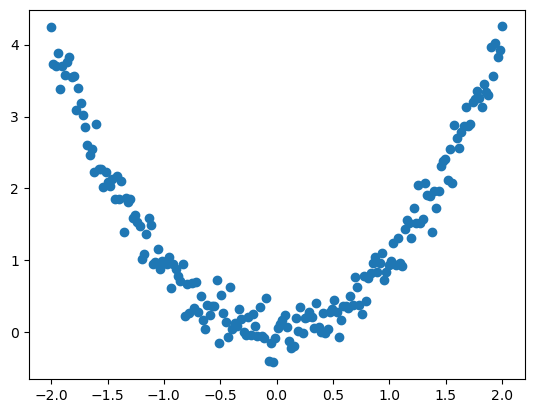

In [2]:
x_data=np.linspace(-2,2,200)[:,np.newaxis]# 这里加一个维度有点像把行向量变为列向量
noise=np.random.normal(0,0.2,x_data.shape)
y_data=x_data**2+noise
plt.scatter(x_data,y_data)
plt.show()

In [3]:
x_data=x_data.reshape(-1,1)
y_data=y_data.reshape(-1,1)
# 转tensor
x_data=torch.FloatTensor(x_data)
y_data=torch.FloatTensor(y_data)
inputs=Variable(x_data)
target=Variable(y_data)

In [4]:
# 构建神经网络
class NonLinearRegression(nn.Module):
    # 网络结构和神经元
    def __init__(self) :
        super(NonLinearRegression,self).__init__()
        self.fc1=nn.Linear(1,10)
        self.tanh=nn.Tanh()
        self.fc2=nn.Linear(10,1)
    #网络计算
    def forward(self,x):
        x=self.fc1(x)
        x=self.tanh(x)
        x=self.fc2(x)
        return x



In [5]:
model=NonLinearRegression()
# 定义代价函数
Loss=nn.MSELoss()
# 定义优化器
opt=torch.optim.SGD(model.parameters(),lr=0.3)

In [6]:
for name,parameters in model.named_parameters():
    print('name:{},parameter:{}'.format(name,parameters))

name:fc1.weight,parameter:Parameter containing:
tensor([[ 0.3593],
        [-0.0192],
        [-0.5836],
        [ 0.3432],
        [ 0.9004],
        [-0.1352],
        [-0.7487],
        [-0.8161],
        [-0.6649],
        [ 0.0140]], requires_grad=True)
name:fc1.bias,parameter:Parameter containing:
tensor([ 0.2801, -0.5178, -0.8667,  0.8285,  0.8712,  0.1044, -0.0196,  0.2968,
        -0.9905, -0.2347], requires_grad=True)
name:fc2.weight,parameter:Parameter containing:
tensor([[ 0.1014, -0.0025,  0.0275,  0.2823,  0.0104,  0.2583,  0.0704, -0.2938,
         -0.2260,  0.2937]], requires_grad=True)
name:fc2.bias,parameter:Parameter containing:
tensor([-0.2826], requires_grad=True)


In [7]:
for i in range(2000):
    out=model(inputs)
    loss=Loss(out,target)
    #梯度清零
    opt.zero_grad()
    #反向传播算梯度
    loss.backward()
    # 更新权值
    opt.step()
    if i%200==0:
        print(i,loss.item())

0 3.6204833984375
200 0.21756725013256073
400 0.10243154317140579
600 0.0913056954741478
800 0.083102747797966
1000 0.07594148814678192
1200 0.07237859815359116
1400 0.0705617219209671
1600 0.06937118619680405
1800 0.0684371069073677


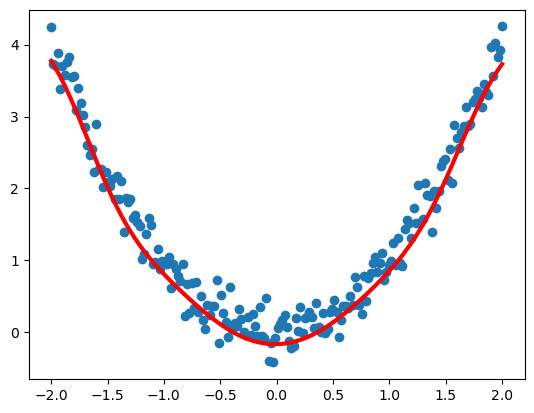

In [8]:
y_predict=model(inputs)
plt.scatter(inputs,target)
plt.plot(x_data,y_predict.data.numpy(),'r-',lw=3)
plt.show()